In [1]:
import pandas as pd

# 读取数据
data = pd.read_csv("../data/dataset.csv")
data

,O,N,SSA,PV,RMIC,Dap,IDperIG,M,Anion,AML,PW,CD,Cs
0,7.15,3.52,1546.1,0.5753,93.985747,1.488390,1.029,2,1,1.0,1.6,0.10,85.0
1,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.10,90.2
2,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.25,86.3
3,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.50,79.9
4,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,1.00,70.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,1.00,90.1
596,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,2.00,84.7
597,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,5.00,75.5
598,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,8.00,69.4


In [2]:
from sklearn.model_selection import train_test_split
data['target_class'] = pd.qcut(data['Cs'], q=10, labels=False)
X = data.drop(['Cs', 'target_class'], axis=1)
y = data['Cs']
stratify_column = data['target_class']

# 数据拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

# 线性回归 Linear Regression

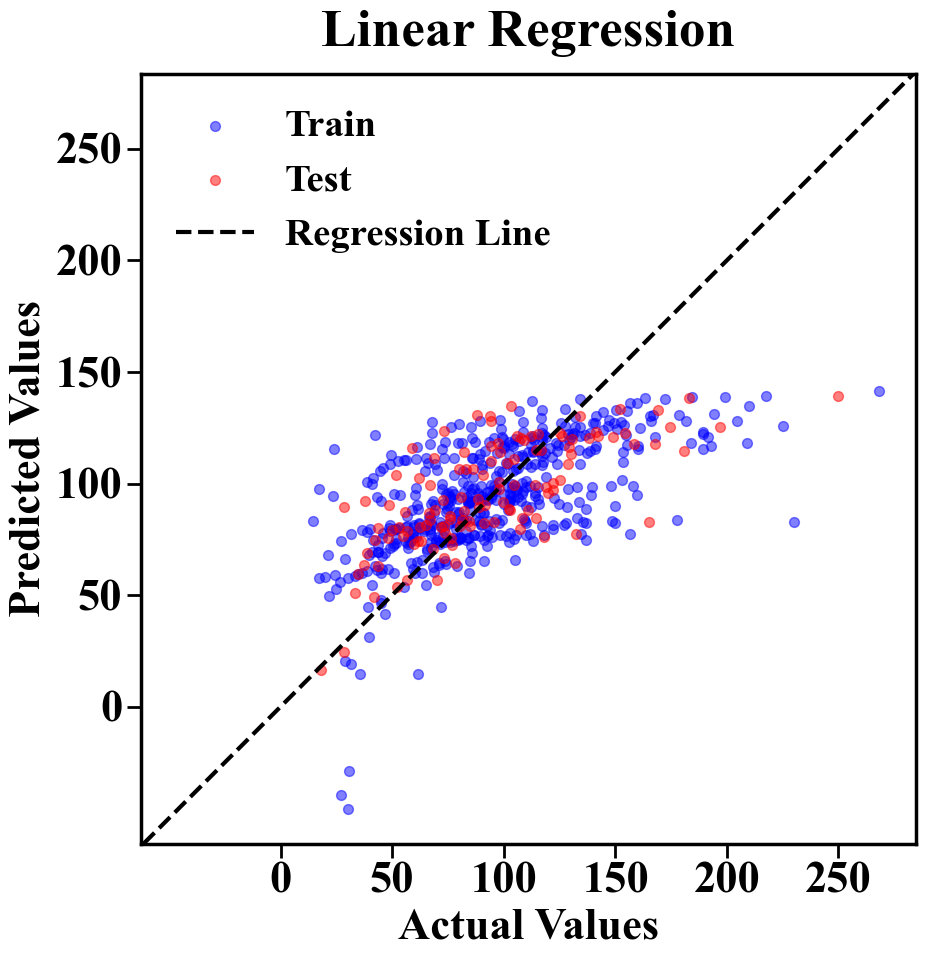

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Linear Regression,0.39119,23.192948,33.520184,31.148635,0.476773,21.80851,27.6218,28.706683


In [3]:
from function import metrics_to_dataframe, plot_actual_vs_predicted
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

lr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Linear Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Linear Regression','lr.png')

lr_metrics

# 支持向量回归Support Vector Regression

[LibSVM]

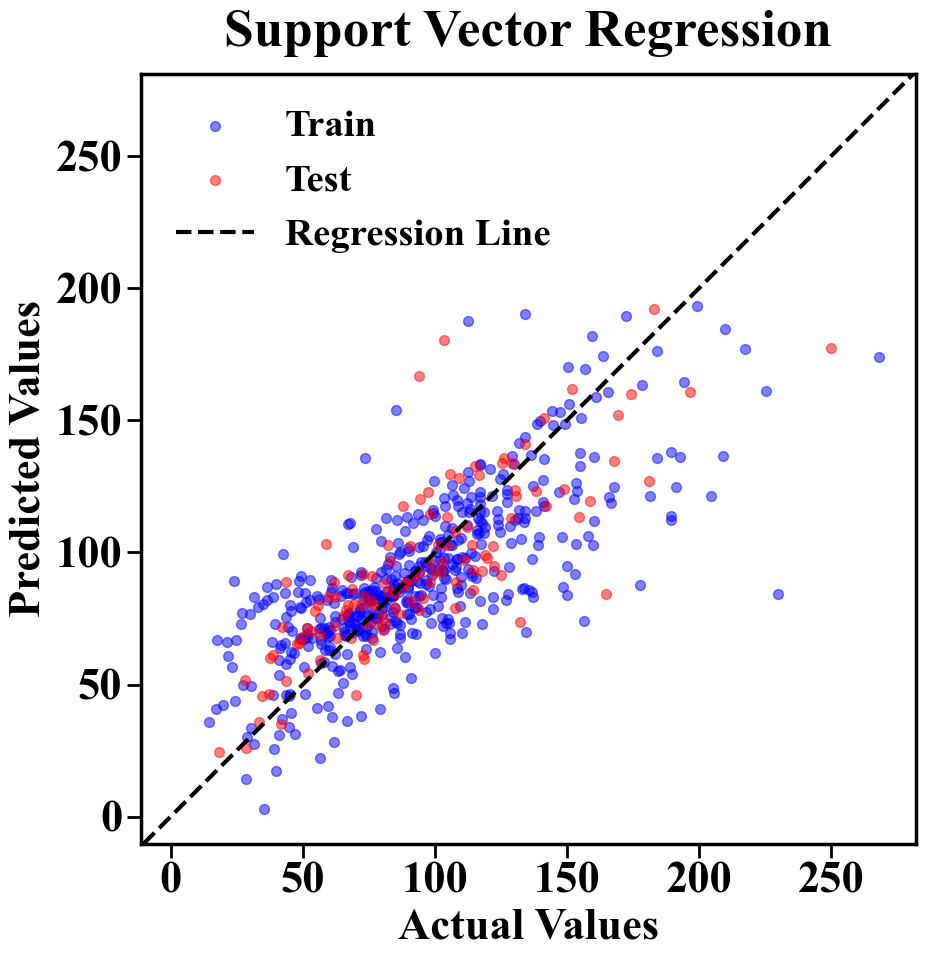

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Support Vector Regression,0.568834,18.842456,25.715193,26.213206,0.655637,17.219387,20.487802,23.288771


In [15]:
from sklearn.svm import SVR

svr = SVR(
    C=6, 
    kernel='poly', 
    degree=8, 
    gamma='scale', 
    coef0=5, 
    epsilon=0.75, 
    verbose=True
)

svr.fit(X_train, y_train)

y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

svr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Support Vector Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Support Vector Regression', 'svr.png')

svr_metrics

# 随机森林回归Random Forest Regression

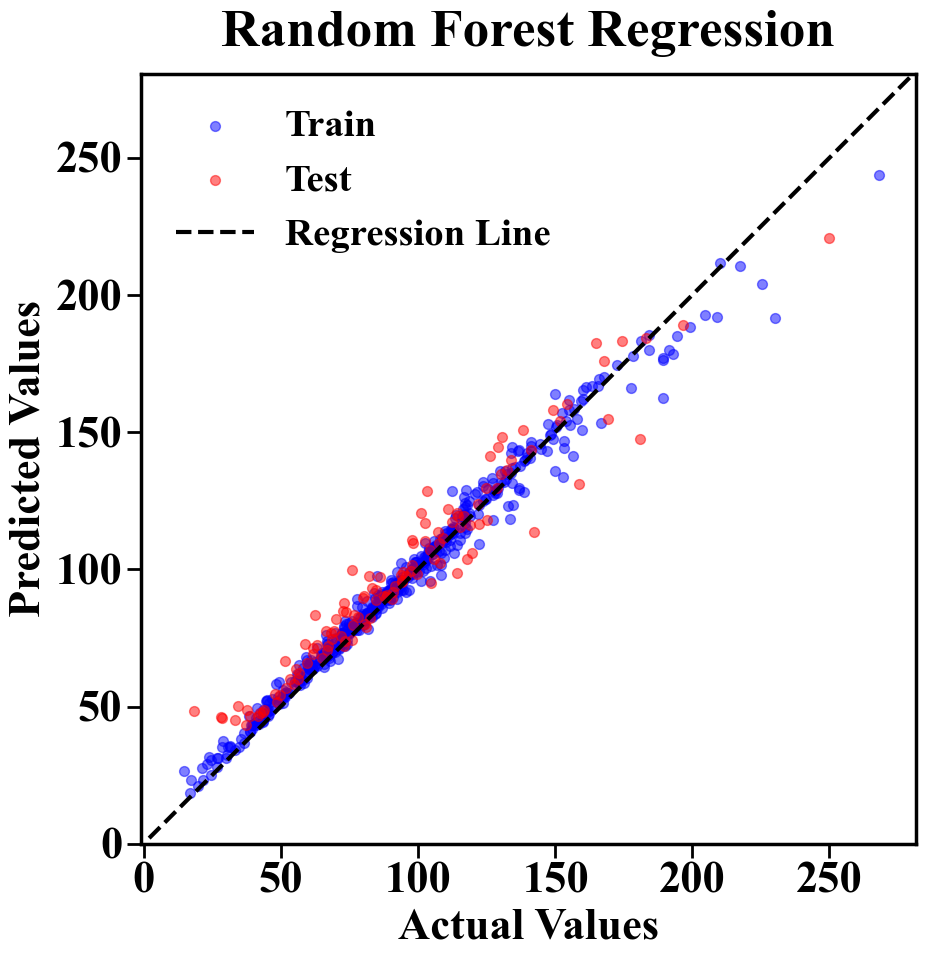

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Randon Forest Regression,0.98185,3.741988,4.785472,5.378152,0.925047,8.295011,11.609274,10.865045


In [5]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=50,
                            max_depth=32,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            max_features=1,
                            random_state=21)
rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

rfr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Randon Forest Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Random Forest Regression','rfr.png')

rfr_metrics

# 梯度提升回归Gradient Boosting Regression

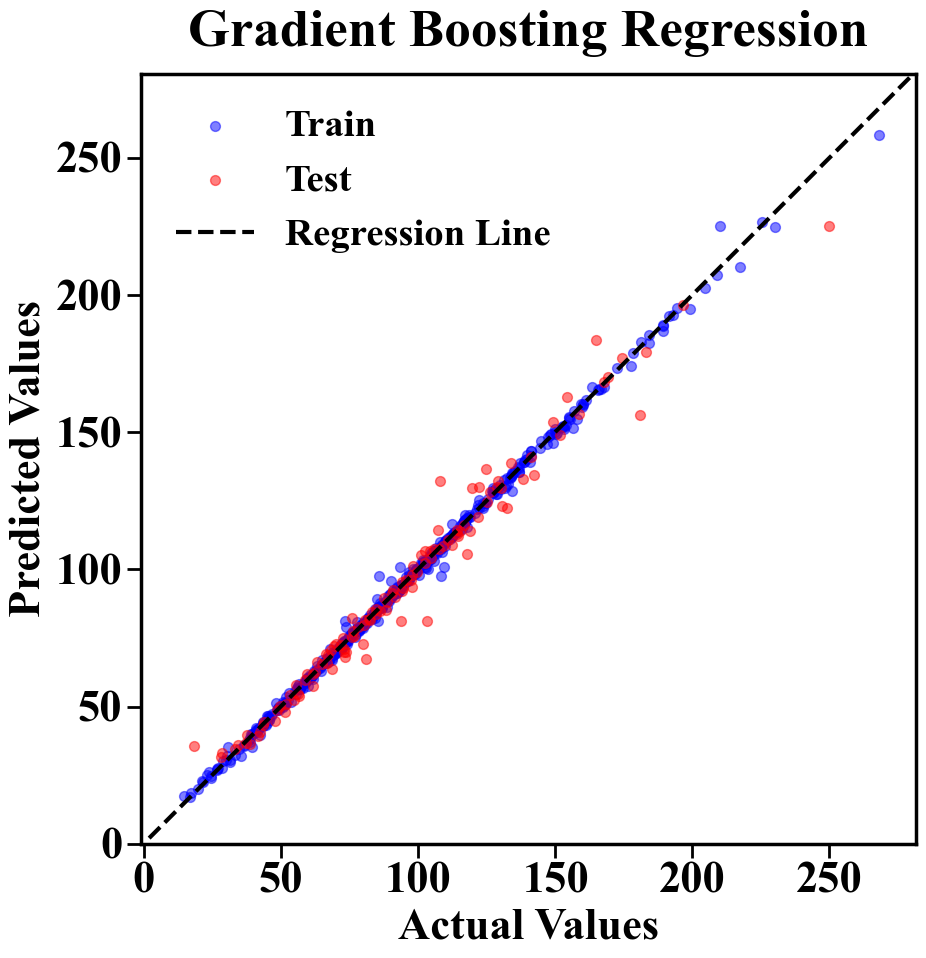

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Gradient Boosting Regression,0.997957,0.990447,1.245124,1.80436,0.975303,3.6516,4.498728,6.236761


In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=300,
                                alpha=0.001,
                                learning_rate=0.05,
                                max_depth=13,
                                max_features=0.98,
                                min_samples_leaf=7,
                                min_samples_split=5,
                                subsample=0.63,
                                random_state=21)
gbr.fit(X_train, y_train)

y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

gbr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Gradient Boosting Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Gradient Boosting Regression','gbr.png')

gbr_metrics

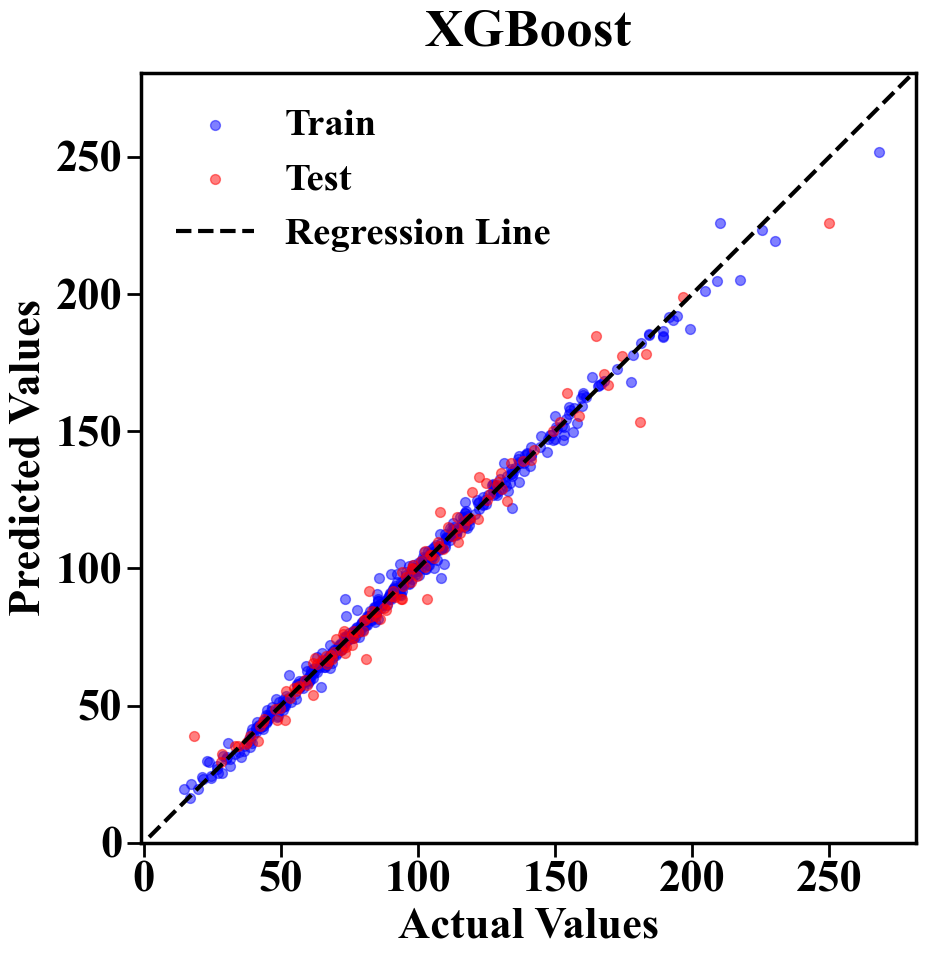

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,XGBoost,0.994685,1.836017,2.317726,2.910507,0.979241,3.393341,4.350447,5.717943


In [7]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500,
                   learning_rate=0.05,
                   subsample=0.81,
                   gamma=0.8,
                   max_depth=27,
                   min_child_weight=9,
                   reg_alpha=0.5,
                   colsample_bytree=0.9,
                   colsample_bylevel=0.6,
                   colsample_bynode=0.5,
                   random_state=21)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

xgb_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost','XGB.png')

xgb_metrics

# LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 474
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 12
[LightGBM] [Info] Start training from score 93.467937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

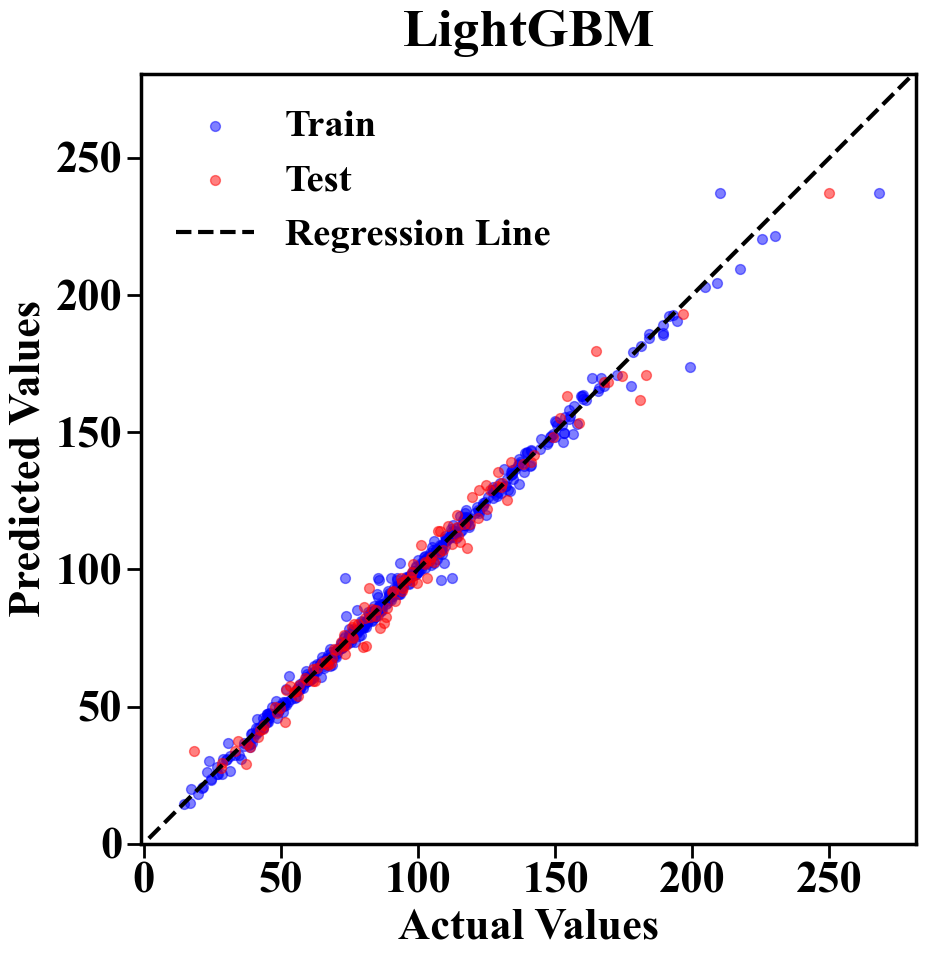

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,LightGBM,0.992354,1.840926,2.233251,3.490807,0.985155,3.357714,4.259907,4.835414


In [8]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    colsample_bytree=0.25,
    learning_rate=0.09,
    max_depth=17,
    min_child_samples=11,
    n_estimators=500,
    num_leaves=119,
    reg_alpha=0.66,
    reg_lambda=0.17,
    subsample=0.95,
    random_state=21
)

lgbm.fit(X_train, y_train)

y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

lgbm_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'LightGBM')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'LightGBM','LightGBM.png')

lgbm_metrics

In [11]:
metrics = pd.concat([lr_metrics,svr_metrics, rfr_metrics, gbr_metrics, lgbm_metrics, xgb_metrics])
metrics_rounded = metrics.round(3)
metrics_rounded.to_markdown('report_models_old.md', index=False, tablefmt='github')
metrics_rounded

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Linear Regression,0.391,23.193,33.520,31.149,0.477,21.809,27.622,28.707
0,Support Vector Regression,0.342,23.749,32.818,32.386,0.428,22.339,27.523,30.015
0,Randon Forest Regression,0.982,3.742,4.785,5.378,0.925,8.295,11.609,10.865
0,Gradient Boosting Regression,0.998,0.990,1.245,1.804,0.975,3.652,4.499,6.237
0,LightGBM,0.992,1.841,2.233,3.491,0.985,3.358,4.260,4.835
0,XGBoost,0.995,1.836,2.318,2.911,0.979,3.393,4.350,5.718
